# Data Gathering

## WL Data

In [167]:
from fastai.tabular import *

In [168]:
df = pd.read_pickle('./data/ligamx/WLT2')

In [169]:
df_ns = pd.read_pickle('./data/ligamx/WLT_new_season')

In [170]:
df = pd.concat([df, df_ns])
df.reset_index(drop = True, inplace = True)

In [171]:
df.at[4948, "JRD"] = 4
df.at[4949, "JRD"] = 4

In [172]:
df.drop(df.index[range(4950, 4959)], inplace=True)
df.reset_index(drop=True, inplace=True)

In [173]:
# sorting
import numpy as np
df['sort_val'] = df.ANO + df.JRD/1000 + (df.TIPO == 'apertura')/10
df = df.sort_values('sort_val').drop('sort_val', 1)

In [174]:
df.reset_index(drop=True, inplace=True)

In [175]:
teams = []

for name in df.LOC.unique():
    curr_df_loc = df[df.LOC == name].copy()
    curr_df_loc["ES_LOC"] = True
    curr_df_loc['EQUIPO'] = curr_df_loc.LOC
    curr_df_loc['EQUIPO_C'] = curr_df_loc.VIS
    del curr_df_loc['LOC']
    del curr_df_loc['VIS']
    
#     curr_df_vis = df[df.VIS == name].copy()
#     curr_df_vis["ES_LOC"] = False
#     curr_df_vis['EQUIPO'] = curr_df_vis.VIS
#     curr_df_vis['EQUIPO_C'] = curr_df_vis.LOC
#     del curr_df_vis['LOC']
#     del curr_df_vis['VIS']
    
#     curr_df_vis['is_cero'] = curr_df_vis.RES == 0
#     curr_df_vis['is_two'] = curr_df_vis.RES == 2
    
#     curr_df_vis.loc[curr_df_vis.is_cero == True, 'RES'] = 2
#     curr_df_vis.loc[curr_df_vis.is_two == True, 'RES'] = 0
    
#     del curr_df_vis['is_cero']
#     del curr_df_vis['is_two']
    
#     curr_df = pd.concat([curr_df_loc, curr_df_vis]).copy()
    curr_df = curr_df_loc
    
    curr_df['sort_val'] = curr_df.ANO + curr_df.JRD/1000 + (curr_df.TIPO == 'apertura')/10
    curr_df = curr_df.sort_values('sort_val').drop('sort_val', 1)
    curr_df.reset_index(drop = True, inplace = True)
    teams.append(curr_df)

In [176]:
teams[4].tail()

,JRD,ANO,TIPO,L_POS,L_JJ,JG_x,JE_x,JP_x,GF_x,GC_x,DIF_x,PTS_x,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,L_R_GF_JJ,L_R_GC_JJ,L_R_DIF_JJ,L_R_PTS_JJ,V_POS,V_JJ,JG_y,JE_y,JP_y,GF_y,GC_y,DIF_y,PTS_y,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,ES_LOC,EQUIPO,EQUIPO_C
269,12.0,2019,apertura,11.0,12.0,5.0,2.0,5.0,14.0,13.0,1.0,17.0,0.3,0.2,0.5,1.10,1.30,-0.2,1.1,4.0,11.0,5.0,3.0,3.0,19.0,13.0,6.0,18.0,0.4,0.30,0.20,1.70,1.1,0.60,1.50,2,True,atlas,queretaro
270,15.0,2019,apertura,7.0,15.0,6.0,3.0,6.0,17.0,17.0,0.0,21.0,0.3,0.3,0.4,1.20,1.20,0.0,1.2,2.0,15.0,8.0,4.0,3.0,30.0,18.0,12.0,28.0,0.6,0.30,0.10,2.00,1.3,0.70,2.10,0,True,atlas,necaxa
271,17.0,2019,apertura,10.0,17.0,6.0,3.0,8.0,19.0,24.0,-5.0,21.0,0.3,0.3,0.4,1.10,1.30,-0.2,1.2,14.0,16.0,6.0,2.0,8.0,21.0,26.0,-5.0,20.0,0.3,0.10,0.60,1.50,1.8,-0.30,1.00,0,True,atlas,atletico de san luis
272,2.0,2020,clausura,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.00,1.00,1.0,3.0,16.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,1.00,0.00,1.0,-1.00,0.00,0,True,atlas,puebla
273,5.0,2020,clausura,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,0.5,1.25,1.25,0.0,1.5,18.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.25,0.75,0.75,2.0,-1.25,0.25,1,True,atlas,morelia


In [177]:
n_teams = []
for sub_t in teams:
    if(len(sub_t[sub_t.ANO == 2020]) > 0): n_teams.append(sub_t)
teams = n_teams

In [178]:
len(n_teams)

18

## Goals data

In [1171]:
from fastai.tabular import *

In [1172]:
pd.set_option('display.max_columns', None)

In [1173]:
df = pd.read_pickle('./data/ligamx/Goals-Match')

In [1174]:
df.tail()

,LOC,VIS,GL,GV,JRD,FECHA,HORA,ANO,TIPO,L_POS,L_JJ,JG_x,JE_x,JP_x,GF_x,GC_x,DIF_x,PTS_x,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,L_R_GF_JJ,L_R_GC_JJ,L_R_DIF_JJ,L_R_PTS_JJ,V_POS,V_JJ,JG_y,JE_y,JP_y,GF_y,GC_y,DIF_y,PTS_y,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
4919,cruz azul,uag,2.0,2.0,19.0,15/5/2004,17:00,2004,clausura,12.0,19.0,6.0,5.0,8.0,36.0,34.0,2.0,23.0,0.6,0.2,0.2,3.2,1.8,1.4,2.0,19.0,19.0,5.0,3.0,11.0,32.0,40.0,-8.0,18.0,0.4,0.0,0.6,1.4,1.6,-0.2,1.2,1
4920,morelia,pachuca,4.0,1.0,19.0,15/5/2004,17:00,2004,clausura,16.0,19.0,6.0,5.0,8.0,25.0,34.0,-9.0,23.0,0.2,0.2,0.6,0.8,2.6,-1.8,0.8,6.0,19.0,6.0,8.0,5.0,32.0,33.0,-1.0,26.0,0.2,0.6,0.2,2.4,2.0,0.4,1.2,2
4921,necaxa,atlas,0.0,1.0,19.0,15/5/2004,17:00,2004,clausura,14.0,19.0,5.0,6.0,8.0,22.0,26.0,-4.0,21.0,0.2,0.2,0.6,1.0,2.0,-1.0,0.8,7.0,19.0,6.0,9.0,4.0,28.0,25.0,3.0,27.0,0.0,0.8,0.2,1.2,1.4,-0.2,0.8,0
4922,guadalajara,san luis,4.0,1.0,19.0,15/5/2004,19:00,2004,clausura,4.0,19.0,9.0,5.0,5.0,29.0,23.0,6.0,32.0,0.4,0.4,0.2,2.2,1.4,0.8,1.6,18.0,19.0,4.0,6.0,9.0,23.0,34.0,-11.0,18.0,0.2,0.4,0.4,1.8,2.0,-0.2,1.0,2
4923,irapuato,veracruz,3.0,2.0,19.0,16/5/2004,17:00,2004,clausura,11.0,19.0,6.0,8.0,5.0,23.0,30.0,-7.0,26.0,0.0,1.0,0.0,0.8,0.8,0.0,1.0,20.0,19.0,4.0,5.0,10.0,25.0,41.0,-16.0,17.0,0.2,0.0,0.8,1.2,3.6,-2.4,0.6,2


In [1175]:
max(list(df.L_POS.unique()))

20.0

In [1176]:
max(list(df.V_POS.unique()))

20.0

In [1177]:
# df_ns = pd.read_pickle('./data/ligamx/Goals-Match_new_season')

In [1178]:
# df = pd.concat([df, df_ns])
df.reset_index(drop = True, inplace = True)

In [1179]:
len(df)

4924

In [1180]:
# df.at[4948, "JRD"] = 4
# df.at[4949, "JRD"] = 4

In [1181]:
# df.drop(df.index[range(4950, 4959)], inplace=True)
# df.reset_index(drop=True, inplace=True)

In [1182]:
# print(len(df))
# index_erase = df[(df.ANO == 2019) & (df.TIPO == 'apertura') & (df.JRD >= 15)].index
# print(len(index_erase))
# df.drop(index_erase, inplace = True)
# df.reset_index(drop = True, inplace = True)
# print(len(df))

In [1183]:
# sorting
import numpy as np
df['sort_val'] = df.ANO + df.JRD/1000 + (df.TIPO == 'apertura')/10
df = df.sort_values('sort_val').drop('sort_val', 1)

In [1184]:
df.reset_index(drop=True, inplace=True)

In [1185]:
teams = []

for name in df.LOC.unique():
    #team as local setup
    curr_df_loc = df[df.LOC == name].copy()
    curr_df_loc["ES_LOC"] = True
    curr_df_loc['EQUIPO'] = curr_df_loc.LOC
    curr_df_loc['EQUIPO_C'] = curr_df_loc.VIS
    curr_df_loc['GE'] = curr_df_loc.GL
    curr_df_loc['GEC'] = curr_df_loc.GV
    
    del curr_df_loc['LOC']
    del curr_df_loc['VIS']
    del curr_df_loc['GL']
    del curr_df_loc['GV']
    
    #team as visitor setup
    curr_df_vis = df[df.VIS == name].copy()
    curr_df_vis["ES_LOC"] = False
    curr_df_vis['EQUIPO'] = curr_df_vis.VIS
    curr_df_vis['EQUIPO_C'] = curr_df_vis.LOC
    curr_df_vis['GE'] = curr_df_vis.GV
    curr_df_vis['GEC'] = curr_df_vis.GL
    
    del curr_df_vis['LOC']
    del curr_df_vis['VIS']
    del curr_df_vis['GL']
    del curr_df_vis['GV']
    
    curr_df_vis['is_cero'] = curr_df_vis.RES == 0
    curr_df_vis['is_two'] = curr_df_vis.RES == 2
    
    curr_df_vis.loc[curr_df_vis.is_cero == True, 'RES'] = 2
    curr_df_vis.loc[curr_df_vis.is_two == True, 'RES'] = 0
    
    del curr_df_vis['is_cero']
    del curr_df_vis['is_two']
    
    cont_vars = ['POS', 'R_JG_JJ', 'R_JE_JJ', 'R_JP_JJ', 'R_GF_JJ', 'R_GC_JJ', 'R_DIF_JJ', 'R_PTS_JJ']
    for cont_v in cont_vars:
        curr_df_vis['L_' + cont_v + '_AUX'] = curr_df_vis['L_' + cont_v]
        curr_df_vis['L_' + cont_v] = curr_df_vis['V_' + cont_v]
        curr_df_vis['V_' + cont_v] = curr_df_vis['L_' + cont_v + '_AUX']
        del curr_df_vis['L_' + cont_v + '_AUX']
    
    
    #concatenating them
    curr_df = pd.concat([curr_df_loc, curr_df_vis]).copy()
    
    curr_df['sort_val'] = curr_df.ANO + curr_df.JRD/1000 + (curr_df.TIPO == 'apertura')/10
    curr_df = curr_df.sort_values('sort_val').drop('sort_val', 1)
    curr_df.reset_index(drop = True, inplace = True)
    teams.append(curr_df)

In [1186]:
teams[4].tail()

,JRD,FECHA,HORA,ANO,TIPO,L_POS,L_JJ,JG_x,JE_x,JP_x,GF_x,GC_x,DIF_x,PTS_x,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,L_R_GF_JJ,L_R_GC_JJ,L_R_DIF_JJ,L_R_PTS_JJ,V_POS,V_JJ,JG_y,JE_y,JP_y,GF_y,GC_y,DIF_y,PTS_y,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,ES_LOC,EQUIPO,EQUIPO_C,GE,GEC
284,13.0,7/4/2013,18:00,2013,clausura,18.0,13.0,2.0,1.0,10.0,11.0,29.0,-18.0,7.0,0.2,0.2,0.6,1.2,1.4,-0.2,0.8,17.0,13.0,2.0,3.0,8.0,14.0,21.0,-7.0,9.0,0.0,0.0,1.0,0.2,2.4,-2.2,0.0,2,False,san luis,atlante,1.0,0.0
285,14.0,13/4/2013,21:00,2013,clausura,16.0,14.0,2.0,4.0,8.0,16.0,23.0,-7.0,10.0,0.4,0.2,0.4,1.4,1.0,0.4,1.4,2.0,14.0,8.0,4.0,2.0,18.0,11.0,7.0,28.0,0.6,0.2,0.2,1.0,0.6,0.4,2.0,1,True,san luis,atlas,2.0,2.0
286,15.0,20/4/2013,17:00,2013,clausura,16.0,15.0,5.0,6.0,4.0,14.0,16.0,-2.0,21.0,0.4,0.4,0.2,1.6,1.0,0.6,1.6,11.0,15.0,2.0,4.0,9.0,17.0,25.0,-8.0,10.0,0.4,0.2,0.4,0.8,0.8,0.0,1.4,0,False,san luis,queretaro,1.0,2.0
287,16.0,27/4/2013,21:00,2013,clausura,18.0,16.0,3.0,4.0,9.0,18.0,25.0,-7.0,13.0,0.4,0.4,0.2,1.6,1.0,0.6,1.6,11.0,16.0,5.0,3.0,8.0,15.0,21.0,-6.0,18.0,0.0,0.4,0.6,0.6,2.0,-1.4,0.4,2,True,san luis,tijuana,1.0,0.0
288,17.0,5/5/2013,12:00,2013,clausura,17.0,17.0,5.0,3.0,9.0,14.0,21.0,-7.0,18.0,0.6,0.2,0.2,1.6,0.8,0.8,2.0,12.0,17.0,4.0,4.0,9.0,19.0,25.0,-6.0,16.0,0.4,0.0,0.6,0.8,1.2,-0.4,1.2,2,False,san luis,toluca,1.0,0.0


In [1187]:
list(teams[0].columns)

['JRD',
 'FECHA',
 'HORA',
 'ANO',
 'TIPO',
 'L_POS',
 'L_JJ',
 'JG_x',
 'JE_x',
 'JP_x',
 'GF_x',
 'GC_x',
 'DIF_x',
 'PTS_x',
 'L_R_JG_JJ',
 'L_R_JE_JJ',
 'L_R_JP_JJ',
 'L_R_GF_JJ',
 'L_R_GC_JJ',
 'L_R_DIF_JJ',
 'L_R_PTS_JJ',
 'V_POS',
 'V_JJ',
 'JG_y',
 'JE_y',
 'JP_y',
 'GF_y',
 'GC_y',
 'DIF_y',
 'PTS_y',
 'V_R_JG_JJ',
 'V_R_JE_JJ',
 'V_R_JP_JJ',
 'V_R_GF_JJ',
 'V_R_GC_JJ',
 'V_R_DIF_JJ',
 'V_R_PTS_JJ',
 'RES',
 'ES_LOC',
 'EQUIPO',
 'EQUIPO_C',
 'GE',
 'GEC']

In [1188]:
teams[1].tail()

,JRD,FECHA,HORA,ANO,TIPO,L_POS,L_JJ,JG_x,JE_x,JP_x,GF_x,GC_x,DIF_x,PTS_x,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,L_R_GF_JJ,L_R_GC_JJ,L_R_DIF_JJ,L_R_PTS_JJ,V_POS,V_JJ,JG_y,JE_y,JP_y,GF_y,GC_y,DIF_y,PTS_y,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,ES_LOC,EQUIPO,EQUIPO_C,GE,GEC
352,13.0,29/3/2014,19:00,2014,clausura,5.0,13.0,4.0,3.0,6.0,12.0,16.0,-4.0,15.0,0.6,0.2,0.2,1.6,1.8,-0.2,2.0,16.0,13.0,5.0,3.0,5.0,16.0,21.0,-5.0,18.0,0.4,0.0,0.6,0.8,1.2,-0.4,1.2,0,False,atlante,monterrey,2.0,3.0
353,14.0,6/4/2014,17:00,2014,clausura,7.0,14.0,5.0,3.0,6.0,16.0,23.0,-7.0,18.0,0.6,0.0,0.4,2.0,2.4,-0.4,1.8,16.0,14.0,4.0,5.0,5.0,10.0,12.0,-2.0,17.0,0.4,0.2,0.4,1.0,0.8,0.2,1.4,0,True,atlante,tigres,0.0,2.0
354,15.0,13/4/2014,19:00,2014,clausura,10.0,15.0,6.0,6.0,3.0,29.0,24.0,5.0,24.0,0.4,0.0,0.6,1.6,2.6,-1.0,1.2,4.0,15.0,5.0,3.0,7.0,19.0,27.0,-8.0,18.0,0.6,0.4,0.0,2.6,1.6,1.0,2.2,0,False,atlante,santos,3.0,4.0
355,16.0,20/4/2014,17:00,2014,clausura,13.0,16.0,5.0,3.0,8.0,20.0,29.0,-9.0,18.0,0.2,0.0,0.8,1.4,3.0,-1.6,0.6,7.0,16.0,7.0,3.0,6.0,21.0,21.0,0.0,24.0,0.4,0.2,0.4,1.8,1.4,0.4,1.4,0,True,atlante,tijuana,1.0,2.0
356,17.0,26/4/2014,21:00,2014,clausura,16.0,17.0,6.0,5.0,6.0,23.0,23.0,0.0,23.0,0.2,0.0,0.8,1.6,2.4,-0.8,0.6,14.0,17.0,5.0,3.0,9.0,22.0,34.0,-12.0,18.0,0.4,0.2,0.4,1.2,1.4,-0.2,1.4,0,False,atlante,chiapas,2.0,5.0


End -> Setting up continious variables

In [1189]:
n_teams = []
for sub_t in teams:
    if len(sub_t[sub_t.ANO == 2019][sub_t.JRD == 8.0][sub_t.TIPO == 'apertura']) > 0 or len(sub_t[sub_t.ANO == 2019][sub_t.JRD == 9.0][sub_t.TIPO == 'apertura']):
#     if(len(sub_t[(sub_t.ANO == 2019) &]) > 0):
        n_teams.append(sub_t)
teams = n_teams

/home/rober/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1190]:
len(teams)

19

## Data analyzis

In [1191]:
a = {}
b = {}
for sub_t in teams:
    if(len(sub_t) >= 300): a[sub_t.EQUIPO.unique()[0]] = len(sub_t)
    else: b[sub_t.EQUIPO.unique()[0]] = len(sub_t)

In [1192]:
a

{'santos': 545,
 'america': 545,
 'atlas': 545,
 'morelia': 546,
 'monterrey': 545,
 'toluca': 545,
 'cruz azul': 545,
 'guadalajara': 545,
 'tigres': 545,
 'necaxa': 342,
 'unam': 545,
 'puebla': 477,
 'veracruz': 376,
 'pachuca': 545,
 'queretaro': 392}

In [1193]:
b

{'tijuana': 290, 'leon': 256, 'atletico de san luis': 18, 'fc juarez': 18}

# Data Prep

In [1194]:
from fastai import *
from fastai.text import *
from fastai.tabular import *
from fastai import *

In [1195]:
deep_vars = ['RES']
# deep_vars = ['GE']
#categorical values
cat_names = ['EQUIPO', 'EQUIPO_C', 'ES_LOC', 'L_POS', 'V_POS', 'JRD']
#continious variables
cont_names = ['L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ', 'L_R_GC_JJ', 'L_R_DIF_JJ', 'L_R_PTS_JJ',
             'V_R_JG_JJ', 'V_R_JE_JJ', 'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ', 'V_R_PTS_JJ']
procs = [Categorify, Normalize]

In [1196]:
def get_dif(a, b):
    # a - b
    dif_arr = []
    curr_set = {}
    for x in b: curr_set[x] = 1
    for x in a:
        if x not in curr_set: dif_arr.append(x)
    return dif_arr

equipos_set = {}
pos_set = {}
jrd_set = {}

for cdf in teams:
    for nm in cdf.EQUIPO.unique(): equipos_set[nm] = True
    for nm in cdf.EQUIPO_C.unique(): equipos_set[nm] = True
   
    for nm in cdf.L_POS.unique(): pos_set[nm] = True
    for nm in cdf.V_POS.unique(): pos_set[nm] = True
        
    for nm in cdf.JRD.unique(): jrd_set[nm] = True

print(len(equipos_set))
all_equipos = list(equipos_set.keys())
all_pos = list(pos_set.keys())
all_jrd = list(jrd_set.keys())

28


In [1197]:
def my_create(train_ds:Dataset, valid_ds:Dataset, test_ds:Optional[Dataset]=None, path:PathOrStr='.', bs:int=64,
           val_bs:int=None, num_workers:int=defaults.cpus, dl_tfms:Optional[Collection[Callable]]=None,
           device:torch.device=None, collate_fn:Callable=data_collate, no_check:bool=False, **dl_kwargs)->'DataBunch':
    "Create a `DataBunch` from `train_ds`, `valid_ds` and maybe `test_ds` with a batch size of `bs`. Passes `**dl_kwargs` to `DataLoader()`"
    datasets = DataBunch._init_ds(train_ds, valid_ds, test_ds)
    val_bs = ifnone(val_bs, bs)
    dls = [DataLoader(d, b, shuffle=s, drop_last=s, num_workers=num_workers, **dl_kwargs) for d,b,s in zip(datasets, (bs,val_bs,val_bs,val_bs), (False,False,False,False)) if d is not None]
    return DataBunch(*dls, path=path, device=device, dl_tfms=dl_tfms, collate_fn=collate_fn, no_check=no_check)

In [1198]:
ds_teams = []
datas = []

all_equipos.sort()
all_pos.sort()
all_jrd.sort()

order_equipos = []
for cdf in teams:
    order_equipos.append(cdf.EQUIPO.unique())
    
    dif_equipo = get_dif(all_equipos, list(cdf.EQUIPO.unique()))
    dif_equipo_c = get_dif(all_equipos, list(cdf.EQUIPO_C.unique()))
    
    dif_lpos = get_dif(all_pos, list(cdf.L_POS.unique()))
    dif_vpos = get_dif(all_pos, list(cdf.V_POS.unique()))
    
    dif_jrd = get_dif(all_jrd, list(cdf.JRD.unique()))
    
#     print(dif_equipo)
    
    cdf.EQUIPO = cdf.EQUIPO.astype('category')
    cdf.EQUIPO.cat.add_categories(dif_equipo, inplace=True)
    cdf.EQUIPO.cat.reorder_categories(all_equipos, inplace=True)
    
    cdf.EQUIPO_C = cdf.EQUIPO_C.astype('category')
    cdf.EQUIPO_C.cat.add_categories(dif_equipo_c, inplace=True)
    cdf.EQUIPO_C.cat.reorder_categories(all_equipos, inplace=True)
    
    cdf.L_POS = cdf.L_POS.astype('category')
    cdf.L_POS.cat.add_categories(dif_lpos, inplace=True)
    cdf.L_POS.cat.reorder_categories(all_pos, inplace=True)
    
    cdf.V_POS = cdf.V_POS.astype('category')
    cdf.V_POS.cat.add_categories(dif_vpos, inplace=True)
    cdf.V_POS.cat.reorder_categories(all_pos, inplace=True)
    
    cdf.JRD = cdf.JRD.astype('category')
    cdf.JRD.cat.add_categories(dif_jrd, inplace=True)
    cdf.JRD.cat.reorder_categories(all_jrd, inplace=True)
    
    data = (TabularList.from_df(cdf, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
       .split_none()
       .label_from_df(cols=deep_vars))
    data.x._bunch.create = my_create
    data = data.databunch(bs=len(cdf))
    ds_teams.append(next(iter(data.train_dl)))
    datas.append(data)

In [1199]:
ds_teams[17]

[[tensor([[ 4, 27,  2, 18, 15,  1],
          [ 4, 13,  2, 17, 13,  2],
          [ 4,  8,  1, 11, 10,  4],
          [ 4, 22,  2, 15,  4,  5],
          [ 4, 28,  1, 14, 19,  6],
          [ 4, 14,  2, 14, 15,  7],
          [ 4, 16,  1, 13, 11,  8],
          [ 4, 17,  1, 10, 17,  9],
          [ 4, 20,  2,  7,  3, 10],
          [ 4, 24,  1, 10, 16, 11],
          [ 4, 23,  2, 12, 13, 12],
          [ 4,  7,  1, 13, 18, 13],
          [ 4, 18,  2, 11,  7, 14],
          [ 4, 11,  1, 12,  3, 15],
          [ 4,  1,  2, 14,  5, 16],
          [ 4,  3,  1, 14, 10, 17],
          [ 4, 15,  2, 14,  2, 18],
          [ 4,  6,  1, 15, 14, 19]]),
  tensor([[-1.7732, -0.7088, -1.5743, -1.5600, -2.3512,  0.5350, -1.6999, -0.7346,
           -0.2695,  1.6427, -0.3394,  1.1721, -1.1042, -0.8233],
          [-1.7732, -0.7088,  1.8675, -1.5600,  0.8898, -2.3252, -1.6999,  0.3673,
           -0.2695,  0.1643,  0.8824,  0.0419,  0.5754,  0.3467],
          [ 0.2031, -0.7088, -0.4270, -1.0771, -1.27

In [1200]:
len(ds_teams)

19

In [1201]:
ds_teams_valid = []
n_valid_bptt = 1

for tm in range(len(teams)):
    sz = len(ds_teams[tm][1])
    ds_teams_valid.append( ((ds_teams[tm][0][0][sz-n_valid_bptt :],ds_teams[tm][0][1][sz-n_valid_bptt :]), ds_teams[tm][1][sz-n_valid_bptt :]) )
    ds_teams[tm] = ((ds_teams[tm][0][0][:sz-n_valid_bptt ],ds_teams[tm][0][1][:sz-n_valid_bptt ]), ds_teams[tm][1][:sz-n_valid_bptt ])


In [1202]:
ds_teams[17][1]

tensor([0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0])

In [1203]:
ds_teams_valid[17][1]

tensor([0])

In [1204]:
teams[17].tail(10)

,JRD,FECHA,HORA,ANO,TIPO,L_POS,L_JJ,JG_x,JE_x,JP_x,GF_x,GC_x,DIF_x,PTS_x,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,L_R_GF_JJ,L_R_GC_JJ,L_R_DIF_JJ,L_R_PTS_JJ,V_POS,V_JJ,JG_y,JE_y,JP_y,GF_y,GC_y,DIF_y,PTS_y,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,ES_LOC,EQUIPO,EQUIPO_C,GE,GEC
8,10.0,21/9/2019,17:00,2019,apertura,7.0,9.0,4.0,2.0,3.0,12.0,12.0,0.0,14.0,0.6,0.4,0.0,1.8,0.8,1.0,2.2,3.0,9.0,6.0,2.0,1.0,21.0,12.0,9.0,20.0,0.2,0.4,0.2,1.2,1.6,-0.4,1.0,0,True,atletico de san luis,santos,2.0,3.0
9,11.0,26/9/2019,20:00,2019,apertura,10.0,11.0,3.0,2.0,6.0,9.0,14.0,-5.0,11.0,0.6,0.2,0.2,2.0,1.2,0.8,2.0,16.0,10.0,4.0,2.0,4.0,13.0,15.0,-2.0,14.0,0.4,0.2,0.4,1.0,1.0,0.0,1.4,0,False,atletico de san luis,toluca,1.0,3.0
10,12.0,29/9/2019,17:00,2019,apertura,12.0,11.0,4.0,2.0,5.0,15.0,18.0,-3.0,14.0,0.4,0.2,0.4,1.8,1.6,0.2,1.4,13.0,11.0,5.0,2.0,4.0,19.0,21.0,-2.0,17.0,0.4,0.2,0.4,2.0,2.4,-0.4,1.4,0,True,atletico de san luis,tijuana,2.0,3.0
11,13.0,6/10/2019,17:00,2019,apertura,13.0,12.0,3.0,2.0,7.0,9.0,16.0,-7.0,11.0,0.4,0.0,0.6,2.0,2.0,0.0,1.2,18.0,12.0,5.0,2.0,5.0,17.0,19.0,-2.0,17.0,0.4,0.4,0.4,1.2,1.2,0.0,1.4,2,False,atletico de san luis,fc juarez,2.0,1.0
12,14.0,20/10/2019,17:00,2019,apertura,11.0,12.0,5.0,2.0,5.0,17.0,19.0,-2.0,17.0,0.4,0.0,0.6,2.0,2.2,-0.2,1.2,7.0,12.0,6.0,3.0,3.0,21.0,14.0,7.0,21.0,0.0,0.2,0.4,0.6,1.2,-0.6,0.2,0,True,atletico de san luis,queretaro,0.0,2.0
13,15.0,26/10/2019,19:00,2019,apertura,12.0,14.0,7.0,5.0,2.0,31.0,20.0,11.0,26.0,0.2,0.0,0.6,1.4,2.0,-0.6,0.6,3.0,14.0,5.0,2.0,7.0,19.0,24.0,-5.0,17.0,0.4,0.4,0.2,1.8,1.4,0.4,1.6,0,False,atletico de san luis,leon,2.0,3.0
14,16.0,29/10/2019,19:00,2019,apertura,14.0,15.0,5.0,2.0,8.0,19.0,25.0,-6.0,17.0,0.2,0.0,0.8,1.4,2.4,-1.0,0.6,5.0,16.0,7.0,7.0,2.0,26.0,20.0,6.0,28.0,0.4,0.4,0.2,2.2,1.8,0.4,1.6,0,True,atletico de san luis,america,0.0,1.0
15,17.0,1/11/2019,21:00,2019,apertura,14.0,17.0,6.0,3.0,8.0,19.0,24.0,-5.0,21.0,0.2,0.0,0.8,1.2,2.0,-0.8,0.6,10.0,16.0,6.0,2.0,8.0,21.0,26.0,-5.0,20.0,0.4,0.2,0.4,1.2,1.8,-0.6,1.4,2,False,atletico de san luis,atlas,2.0,1.0
16,18.0,9/11/2019,17:00,2019,apertura,14.0,17.0,6.0,2.0,9.0,21.0,28.0,-7.0,20.0,0.4,0.0,0.6,1.2,1.6,-0.4,1.2,2.0,17.0,9.0,4.0,4.0,33.0,20.0,13.0,31.0,0.4,0.2,0.2,1.6,1.2,0.4,1.4,0,True,atletico de san luis,necaxa,0.0,2.0
17,19.0,23/11/2019,19:00,2019,apertura,15.0,18.0,5.0,8.0,5.0,25.0,24.0,1.0,23.0,0.2,0.0,0.8,0.8,1.8,-1.0,0.6,14.0,18.0,6.0,2.0,10.0,22.0,31.0,-9.0,20.0,0.2,0.2,0.4,1.0,1.4,-0.4,0.8,0,False,atletico de san luis,cruz azul,1.0,3.0


In [1205]:
teams_set = {}
for i in range(len(ds_teams)):
    assert(ds_teams[i][0][0][0][0].item() not in teams_set)
    teams_set[ds_teams[i][0][0][0][0].item()] = True

## General Statistics

In [1206]:
loc_wins, tie, vis_wins = len(df[df.RES == 2]), len(df[df.RES == 1]), len(df[df.RES==0])

assert(loc_wins + tie + vis_wins == len(df))

print(loc_wins/len(df), tie/len(df), vis_wins/len(df))

0.4480097481722177 0.2806661251015435 0.27132412672623885


## Custom dataset and dataloader

In [1207]:
import math
class RNNTabDataset(Dataset):
    def __init__(self, dfs, bptt):
        self.dfs = dfs
        self.bs = len(dfs)
        self.bptt = bptt
        
        self.largest= -1;
        for i in range(self.bs): self.largest=max(self.largest, len(dfs[i][0][0]))
        
        self.fix_bptt()
        self.process()
        
    def __getitem__(self, idx):
        #return ((self.data[0][0][idx], self.data[0][1][idx]), self.data[1][idx])
        return self.data[idx]
        
    def __len__(self):
        return len(self.data)
    
    def get_split(self, sub_df, batch, ttl_batches):
        ttl = len(sub_df)
        
        pos_btchs = math.ceil(ttl / float(self.bptt))
        incomplete_btchs = ttl_batches - pos_btchs
        partial_to_use =  ttl % self.bptt
        partial_to_fake = self.bptt - partial_to_use
        repl = sub_df[0] # may be changed by an average function later
        
        #pure repl
        if batch <= incomplete_btchs : return torch.stack([repl] * self.bptt)
        
        #partial repl
        elif batch == incomplete_btchs + 1 and partial_to_use != 0:
            return torch.cat( (torch.stack([repl] * partial_to_fake), sub_df[0:partial_to_use]), 0)
            
        #no repl
        start = (batch-1-incomplete_btchs) * self.bptt#(
        end = (batch-incomplete_btchs) * self.bptt #]
        
        if partial_to_use != 0:
            start = start - partial_to_fake
            end = end - partial_to_fake
        
        if(start >= ttl): print("xd")
        return sub_df[start : end]
    
    def process(self):
        self.data = []
        ttl_batches = math.ceil(self.largest / float(self.bptt))
        for batch in range(1, ttl_batches+1):
            for b in range(self.bs):
                cat = self.get_split(self.dfs[b][0][0], batch, ttl_batches)
                cont = self.get_split(self.dfs[b][0][1], batch, ttl_batches)
                y = self.get_split(self.dfs[b][1], batch, ttl_batches)
                if(len(y) != self.bptt): print(batch, b)
                self.data.append(((cat, cont), y))
    
    def prnt(self):
        print(self.data)
    
    def fix_bptt(self):
        #TODO
        self.ds_len = math.ceil(self.largest / float(self.bptt)) * self.bs * self.bptt

In [1208]:
bptt_use = 20

In [1209]:
rnn_tab_ds = RNNTabDataset(ds_teams, bptt_use)

In [1210]:
rnn_tab_ds_valid = RNNTabDataset(ds_teams_valid, n_valid_bptt)

In [1211]:
batches = len(teams); batches

19

In [1212]:
curr_dl = DataLoader(rnn_tab_ds, batches, shuffle=False, drop_last = False)

In [1213]:
curr_dl_valid = DataLoader(rnn_tab_ds_valid, batches, shuffle=False, drop_last = False)

In [1214]:
len(curr_dl)

28

# Model

## Optimal Learning Rate CLR

In [1215]:
import math
import matplotlib.pyplot as plt

class CLR():
    def __init__(self, train_dl, base_lr = 1e-5, max_lr = 100):
        self.base_lr, self.max_lr = base_lr, max_lr
        self.bn = len(train_dl) - 1 #iterations in our epoch
        ratio = self.max_lr/self.base_lr
        self.mult = ratio ** (1/self.bn)
        self.best_loss = 1e9
        self.iteration = 0
        self.lrs, self.losses = [], []
        
    def calc_lr(self, loss):
        self.iteration += 1
        if math.isnan(loss) or loss > 4*self.best_loss:
            return -1 #stop trying to finf a good learining rate
        if loss < self.best_loss and self.iteration > 1:
            self.best_loss = loss #improve our best loss
        
        mult = self.mult ** self.iteration
        lr = self.base_lr * mult
        self.lrs.append(lr)
        self.losses.append(loss)
        return lr
    
    def plot(self, start = 10, end = -5):
        plt.xlabel("Learning Rate")
        plt.ylabel("Losses")
        plt.plot(self.lrs, self.losses)
        plt.xscale('log') #learning rates are in log scale
        axes = plt.gca()
        axes.set_ylim([0.8,1.5])

In [1216]:
def find_lr(loss_func, opt, clr, model, train_dl):
    running_loss = 0.
    avg_beta = 0.98
    model.train()
    
    for i, curr_batch in enumerate(train_dl):
        x_cat, x_cont, res = curr_batch[0][0].to(device), curr_batch[0][1].to(device), curr_batch[1].to(device) 
        output = model(x_cat, x_cont)
        loss = loss_func(output.view(x_cat.shape[0] * x_cat.shape[1],3), res.view(-1).long())
        
        # calculate smoothed loss
        running_loss = avg_beta * running_loss + (1-avg_beta) * loss
        smoothed_loss = running_loss / (1 - avg_beta**(i+1))
        
        lr = clr.calc_lr(smoothed_loss)
        if lr == -1: break
        for pg in opt.param_groups:
            pg['lr'] = lr
            
        opt.zero_grad()
        loss.backward()
        opt.step()

## Once Cycle

In [1217]:
class OneCycle():
    def __init__(self, nb, max_lr, momentum_vals=(0.95, 0.85), prcnt= 10 , div=10):
        self.nb = nb # total number of iterations including all epochs
        self.div = div # the division factor used to get lower boundary of learning rate
        self.step_len =  int(self.nb * (1- prcnt/100)/2)
        self.high_lr = max_lr # the optimum learning rate, found from LR range test
        self.low_mom = momentum_vals[1]
        self.high_mom = momentum_vals[0]
        self.prcnt = prcnt # percentage of cycle length,we annihilate learning rate below the lower learnig rate (default is 10)
        self.iteration = 0
        self.lrs = []
        self.moms = []
        
    def calc(self): # calculates learning rate and momentum for the batch
        self.iteration += 1
        lr = self.calc_lr()
        mom = self.calc_mom()
        return (lr, mom)
        
    def calc_lr(self):
        if self.iteration==self.nb: # exactly at `d`
            self.iteration = 0
            self.lrs.append(self.high_lr/self.div)
            return self.high_lr/self.div
        
        if self.iteration > 2 * self.step_len: # case c-d
            ratio = (self.iteration - 2 * self.step_len) / (self.nb - 2 * self.step_len)
            lr = self.high_lr * ( 1 - ratio * (1-(1/self.div))/self.div)
        elif self.iteration > self.step_len: # case b-c
            ratio = 1- (self.iteration -self.step_len)/self.step_len
            lr = self.high_lr * (1 + ratio * (self.div - 1)) / self.div
        else : # case a-b
            ratio = self.iteration/self.step_len
            lr = self.high_lr * (1 + ratio * (self.div - 1)) / self.div
        self.lrs.append(lr)
        return lr
    
    def calc_mom(self):
        if self.iteration==self.nb: # exactly at `d`
            self.iteration = 0
            self.moms.append(self.high_mom)
            return self.high_mom
        if self.iteration > 2 * self.step_len: # case c-d
            mom = self.high_mom
        elif self.iteration > self.step_len: # case b-c 
            ratio = (self.iteration -self.step_len)/self.step_len
            mom = self.low_mom + ratio * (self.high_mom - self.low_mom)
        else: # case a-b
            ratio = self.iteration/self.step_len
            mom = self.high_mom - ratio * (self.high_mom - self.low_mom)
        self.moms.append(mom)
        return mom

## Creation

In [1218]:
class RnnTabularModel(nn.Module):
    "Basic model for tabular data."
    def __init__(self, emb_szs:ListSizes, n_cont:int, out_sz:int, lyrs:int, bs:int, ps:float=0.,
                 emb_drop:float=0., y_range:OptRange=None):
        super().__init__()
        self.embeds = nn.ModuleList([embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(emb_drop)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        n_emb = sum(e.embedding_dim for e in self.embeds)
        self.n_emb,self.n_cont,self.y_range = n_emb,n_cont,y_range

        #rnn stuff
        self.nh = n_cont
        for ni, nf in emb_szs: self.nh += nf
        self.rnn = nn.GRU(self.nh, self.nh, lyrs, batch_first=True, dropout=ps)
        self.h_o = nn.Linear(self.nh,out_sz)
        self.bn = BatchNorm1dFlat(self.nh)
        
        self.lyrs = lyrs
        self.bs = bs
        self.reset_h()


    def forward(self, x_cat:Tensor, x_cont:Tensor) -> Tensor:
        i_proc = torch.zeros(x_cat.shape[0], x_cat.shape[1], self.nh);
        
        for i_bptt in range(x_cat.shape[1]):
            curr_cat = x_cat[:,i_bptt,:]
            curr_cont = x_cont[:,i_bptt,:]
            
            if self.n_emb != 0:
                x = [e(curr_cat[:,i]) for i,e in enumerate(self.embeds)]
                x = torch.cat(x, 1)
                x = self.emb_drop(x)
            if self.n_cont != 0:
                curr_cont = self.bn_cont(curr_cont)
                x = torch.cat([x, curr_cont], 1) if self.n_emb != 0 else curr_cont
            i_proc[:, i_bptt] = x
            
        res,h = self.rnn(i_proc, self.h)
        if self.training: self.h = h.detach()            

        curr_res = self.h_o(self.bn(res))
        
        if self.y_range is not None:
            curr_res = (self.y_range[1]-self.y_range[0]) * torch.sigmoid(curr_res) + self.y_range[0]
        
        return curr_res
    
    def reset_h(self):
        self.h = torch.zeros(self.lyrs, self.bs, self.nh)

## Setup

In [1219]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


## Validation setup

In [1220]:
# # This function takes in the model and character as arguments and returns the next character prediction and hidden state
# def get_loss(model, data_cat, data_cont, data_res):
# #     print(model.h)
#     model.eval()
#     out = model(data_cat.to(device), data_cont.to(device))
#     curr_crit = nn.MSELoss()
#     loss_x = curr_crit(out.view(-1), data_res.view(-1))
#     return loss_x
    
# def pred(model, data_cat, data_cont, data_res):
# #     print(model.h)
#     model.eval()
#     m_out = model(data_cat.to(device), data_cont.to(device))
#     return m_out.view(-1), m_out

# def accuracy(model, data_cat, data_cont, data_res):
#     out, _= pred(model, data_cat, data_cont, data_res)
#     ttl = 0
#     for i in range(len(out)):
#         if(data_res.view(-1)[i] == out[i]): ttl += 1;
#     return ttl/len(out)

# This function takes in the model and character as arguments and returns the next character prediction and hidden state
def get_loss(model, data_cat, data_cont, data_res):
#     print(model.h)
    model.eval()
    out = model(data_cat.to(device), data_cont.to(device))
    curr_crit = nn.CrossEntropyLoss()
    loss_x = curr_crit(out.view(data_cat.shape[0] * data_cat.shape[1],3), data_res.view(-1).long())
    return loss_x
    
def pred(model, data_cat, data_cont, data_res):
#     print(model.h)
    model.eval()
    m_out = model(data_cat.to(device), data_cont.to(device))
    prob = nn.functional.softmax(m_out.view(data_cat.shape[0] * data_cat.shape[1], 3), dim=1).data
    # Taking the class with the highest probability score from the output
    out = torch.max(prob, dim=1)[1]
    return out, prob, m_out

def accuracy(model, data_cat, data_cont, data_res):
    out, _, _= pred(model, data_cat, data_cont, data_res)
    ttl = 0
    for i in range(len(out)):
        if(data_res.view(-1)[i] == out[i]): ttl += 1;
    return ttl/len(out)

In [1221]:
curr_it = iter(curr_dl_valid)
tst = next(curr_it)

sample_cat = tst[0][0]
sample_cont = tst[0][1]
sample_res = tst[1]

sample_cat.shape

torch.Size([19, 1, 6])

In [1222]:
sample_res.shape

torch.Size([19, 1])

In [1223]:
# # last batch validation
# curr_it = iter(curr_dl)
# for i in range(len(curr_dl)):
#     x = next(curr_it)
    
# sample_cat = x[0][0]
# sample_cont = x[0][1]
# sample_res = x[1]

## Training setup and model creation

In [1224]:
emb_szs = [(29, 30), (29, 30), (3, 10), (21, 30), (21, 30), (20, 10)]
n_cont =len(cont_names)
# out_sz = 1
out_sz = 3
# val_rng = (-1., 6.)
lyrs = 3
bs = batches
dropout_embeds = 0.2
dropout_reg = 0.2

wd = 0.00001
# wd = 0.

In [1229]:
# Instantiate the model with hyperparameters
# model = RnnTabularModel(emb_szs, n_cont, out_sz, lyrs, bs, dropout_reg, dropout_embeds, val_rng)
model = RnnTabularModel(emb_szs, n_cont, out_sz, lyrs, bs, dropout_reg, dropout_embeds)

# We'll also set the model to the device that we defined earlier (default is CPU)
model.to(device)

# Define hyperparameters
n_epochs = 15
lr = 1e-3

# Define Loss, Optimizer
# criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay = wd, betas=(0.7, 0.29999))

## Training

In [1226]:
#def find_lr(loss_func, opt, clr, model):
clr = CLR(curr_dl)
find_lr(criterion, optimizer, clr, model, curr_dl)

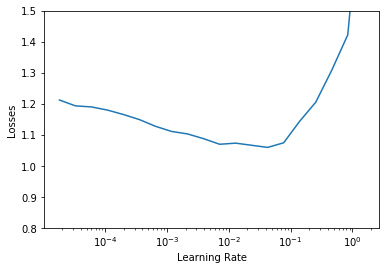

In [1227]:
clr.plot()

In [1228]:
print a

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(a)? (<ipython-input-1228-da1608c9d425>, line 1)

In [ ]:
def changeLrAndMomentums(lr, momentum, opt):
    for pg in opt.param_groups: # update learning rate
        pg['lr'] = lr
        pg['betas'] = (momentum, 1.0-momentum)

In [ ]:
OneCycle??

In [1230]:
# Training Run
use_last = len(curr_dl) 
first_ignore = len(curr_dl) - use_last
oneCycle = OneCycle((len(curr_dl)-first_ignore) * n_epochs, lr, (0.8, 0.7), 10)

loss_avgs = [0 for i in range(use_last)]

for epoch in range(1, n_epochs + 1):
    dl_it = iter(curr_dl)    
    
    model.reset_h()
    model.train()
    
    ttl_loss = 0;
    for i_batch, curr_batch in enumerate(dl_it):
        if(i_batch < first_ignore): continue
#         nlr, nmom = oneCycle.calc()
#         changeLrAndMomentums(nlr, nmom, optimizer)
        
        optimizer.zero_grad() # Clears existing gradients from previous epoch
#         x_cat, x_cont, res = curr_batch[0][0].to(device), curr_batch[0][1].to(device), curr_batch[1].to(device)
        x_cat, x_cont, res = curr_batch[0][0].to(device), curr_batch[0][1].to(device), curr_batch[1].to(device)    
        output = model(x_cat, x_cont)
        
#         loss = criterion(output.view(-1), res.view(-1))
        loss = criterion(output.view(x_cat.shape[0] * x_cat.shape[1],3), res.view(-1).long())
        loss.backward() # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
        ttl_loss += loss.item()
        
        
        loss_avgs[i_batch-first_ignore] += loss.item()/(n_epochs)
        
        if i_batch == len(dl_it)-1:
            loss_valid = get_loss(model, sample_cat, sample_cont, sample_res)
            accuracy_valid = accuracy(model, sample_cat, sample_cont, sample_res)
    
    if epoch%1 == 0:
        print("Epoch: {}/{}.......".format(epoch, n_epochs), end=' ')
        print("Train Loss: {:.4f}......".format(ttl_loss/(len(dl_it)-first_ignore)), end = ' ')
        print("Last batch train Loss: {:.4f}......".format(loss.item()), end = ' ')
#         print('')
        print("Valid Loss: {:.4f}......".format(loss_valid.item()), end = ' ')
        print("Valid acc: {:.4f}".format(accuracy_valid), end=' ')
        print("LR: {:.4f}".format(optimizer.param_groups[0]['lr']))

Epoch: 1/15....... Train Loss: 1.0248...... Last batch train Loss: 1.1510...... Valid Loss: 1.0805...... Valid acc: 0.4211 LR: 0.0010
Epoch: 2/15....... Train Loss: 0.9624...... Last batch train Loss: 1.1265...... Valid Loss: 0.9235...... Valid acc: 0.5263 LR: 0.0010
Epoch: 3/15....... Train Loss: 0.9164...... Last batch train Loss: 1.2039...... Valid Loss: 0.9719...... Valid acc: 0.5263 LR: 0.0010
Epoch: 4/15....... Train Loss: 0.8987...... Last batch train Loss: 1.2056...... Valid Loss: 1.0617...... Valid acc: 0.4737 LR: 0.0010
Epoch: 5/15....... Train Loss: 0.9137...... Last batch train Loss: 1.1273...... Valid Loss: 1.0642...... Valid acc: 0.4737 LR: 0.0010
Epoch: 6/15....... Train Loss: 0.9220...... Last batch train Loss: 1.1982...... Valid Loss: 0.9890...... Valid acc: 0.5789 LR: 0.0010
Epoch: 7/15....... Train Loss: 0.8873...... Last batch train Loss: 1.1630...... Valid Loss: 0.9973...... Valid acc: 0.5263 LR: 0.0010
Epoch: 8/15....... Train Loss: 0.8789...... Last batch train L

In [ ]:
save_path = "./models/1/1"

In [ ]:
torch.save(model.state_dict(), save_path)

In [ ]:
model = RnnTabularModel(emb_szs, n_cont, out_sz, lyrs, bs, dropout_reg, dropout_embeds)
model.load_state_dict(torch.load(save_path))

In [ ]:
print a

In [ ]:
def plot_losses(losses):
    plt.xlabel("batch")
    plt.ylabel("Losses")
    plt.plot([i+1 for i in range(len(losses))], losses)

In [ ]:
plot_losses(loss_avgs)

## Validation Results

In [ ]:
sample_pred, sample_prob, m_out= pred(model, sample_cat, sample_cont, sample_res)

In [ ]:
pred??

In [ ]:
sample_pred.view(-1)

In [ ]:
acc = accuracy(model, sample_cat, sample_cont, sample_res)

In [ ]:
acc

In [ ]:
sample_pred

In [ ]:
sample_res.view(-1)

In [ ]:
res = [0, 0, 0]
ttl = [0, 0, 0]
for i in range(len(sample_pred)):
    if(sample_pred[i] == sample_res.view(-1)[i]): res[sample_pred[i]] += 1
        
for i in range(len(sample_res.view(-1))):
    ttl[sample_res.view(-1)[i]] += 1
        
print(res)
print(ttl)

## Retraining with last batches

In [ ]:
model = RnnTabularModel(emb_szs, n_cont, out_sz, lyrs, bs, dropout_reg, dropout_embeds)
model.load_state_dict(torch.load(save_path))

In [1231]:
lr = 1e-5
wd = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay = wd)

In [1232]:
n_epochs_ret = 15

In [1233]:
# Training Run
use_last = 5
first_ignore = len(curr_dl) - use_last
oneCycle = OneCycle((len(curr_dl)-first_ignore) * n_epochs, lr, (0.8, 0.7), 10, 5)

loss_avgs = [0 for i in range(use_last)]

for epoch in range(1, n_epochs_ret + 1):
    dl_it = iter(curr_dl)    
    
    model.reset_h()
    model.train()
    
    ttl_loss = 0;
    for i_batch, curr_batch in enumerate(dl_it):
        if(i_batch < first_ignore): continue
#         nlr, nmom = oneCycle.calc()
#         changeLrAndMomentums(nlr, nmom, optimizer)
        
        optimizer.zero_grad() # Clears existing gradients from previous epoch
#         x_cat, x_cont, res = curr_batch[0][0].to(device), curr_batch[0][1].to(device), curr_batch[1].to(device)
        x_cat, x_cont, res = curr_batch[0][0].to(device), curr_batch[0][1].to(device), curr_batch[1].to(device)    
        output = model(x_cat, x_cont)
        
#         loss = criterion(output.view(-1), res.view(-1))
        loss = criterion(output.view(x_cat.shape[0] * x_cat.shape[1],3), res.view(-1).long())
        loss.backward() # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
        ttl_loss += loss.item()
        
        
        loss_avgs[i_batch-first_ignore] += loss.item()/(n_epochs_ret)
        
        if i_batch == len(dl_it)-1:
            loss_valid = get_loss(model, sample_cat, sample_cont, sample_res)
            accuracy_valid = accuracy(model, sample_cat, sample_cont, sample_res)
    
    if epoch%1 == 0:
        print("Epoch: {}/{}.......".format(epoch, n_epochs), end=' ')
        print("Train Loss: {:.4f}......".format(ttl_loss/(len(dl_it)-first_ignore)), end = ' ')
        print("Last batch train Loss: {:.4f}......".format(loss.item()), end = ' ')
#         print('')
        print("Valid Loss: {:.4f}......".format(loss_valid.item()), end = ' ')
        print("Valid acc: {:.4f}".format(accuracy_valid), end=' ')
        print("LR: {:.4f}".format(optimizer.param_groups[0]['lr']))

Epoch: 1/15....... Train Loss: 0.9749...... Last batch train Loss: 1.0486...... Valid Loss: 0.7959...... Valid acc: 0.7368 LR: 0.0000
Epoch: 2/15....... Train Loss: 0.9694...... Last batch train Loss: 1.0353...... Valid Loss: 0.7722...... Valid acc: 0.7895 LR: 0.0000
Epoch: 3/15....... Train Loss: 0.9718...... Last batch train Loss: 1.0415...... Valid Loss: 0.7635...... Valid acc: 0.7895 LR: 0.0000
Epoch: 4/15....... Train Loss: 0.9742...... Last batch train Loss: 1.0483...... Valid Loss: 0.7741...... Valid acc: 0.7895 LR: 0.0000
Epoch: 5/15....... Train Loss: 0.9698...... Last batch train Loss: 1.0457...... Valid Loss: 0.7558...... Valid acc: 0.8421 LR: 0.0000
Epoch: 6/15....... Train Loss: 0.9733...... Last batch train Loss: 1.0470...... Valid Loss: 0.7623...... Valid acc: 0.7895 LR: 0.0000
Epoch: 7/15....... Train Loss: 0.9734...... Last batch train Loss: 1.0449...... Valid Loss: 0.7555...... Valid acc: 0.8421 LR: 0.0000
Epoch: 8/15....... Train Loss: 0.9706...... Last batch train L

In [ ]:
plot_losses(loss_avgs)

In [ ]:
len(curr_dl)

## Validation Results

In [ ]:
sample_pred, m_out= pred(model, sample_cat, sample_cont, sample_res)
acc = accuracy(model, sample_cat, sample_cont, sample_res)

In [ ]:
acc

In [ ]:
sample_pred

In [ ]:
sample_res.view(-1)

In [ ]:
for i in range(len(sample_pred)):
    print("Pred: {:.2f} ... Actual: {:.2f} ... Dif: {:.2f}".format(sample_pred.view(-1)[i].item(), sample_res.view(-1)[i].item(), abs(sample_pred.view(-1)[i].item() - sample_res.view(-1)[i].item())))

In [ ]:
c, o, t = 0,0,0
for x in sample_res.view(-1):
    if x == 0: c +=1
    elif x == 1: o += 1
    else: t += 1
print(c, o, t)
print(c/len(sample_res.view(-1)), o/len(sample_res.view(-1)), t/len(sample_res.view(-1)))

In [ ]:
c, o, t = 0,0,0
for x in sample_pred.view(-1):
    if x == 0: c +=1
    elif x == 1: o += 1
    else: t += 1
print(c, o, t)
print(c/len(sample_res.view(-1)), o/len(sample_res.view(-1)), t/len(sample_res.view(-1)))

## Validating data

In [ ]:
sample_res

In [ ]:
order_equipos

In [ ]:
teams[16].tail(22)

In [ ]:
ds_teams[17][1]

In [ ]:
df.tail(10)